In [353]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [354]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [355]:
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [357]:
df.describe(include="object")


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [358]:
df.dropna(subset=['Age'],inplace=True)
#df.Age = df.Age.fillna(df.Age.mean())
df.Age = df.Age.astype(int)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [359]:
# Transformation de la variable Sex
df.Sex = df.Sex.map({'male': 0, 'female': 1})


In [360]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [361]:
df['Cabin'].value_counts()


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 134, dtype: int64

In [362]:

df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [363]:
import pandas as pd

path = r"C:\Users\stephane.holtzmann\Desktop\projets\Story6\titanic.csv"

df = pd.read_csv(path)   # CSV virgule par défaut
print(df.shape)
print(df.columns.tolist())
df.head()


(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [364]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [365]:
df["Age"] = df["Age"].fillna(df["Age"].median())


In [366]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})


In [367]:
df = pd.read_csv("titanic.csv")

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


In [368]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [369]:
# colonnes texte classiques du Titanic Kaggle
to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=[c for c in to_drop if c in df.columns])

# si Sex n'est pas encodé, encode-le
if "Sex" in df.columns and df["Sex"].dtype == "object":
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# si Embarked existe encore, one-hot encode
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Age + Fare NaN (safe)
if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())
if "Fare" in df.columns:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# rebuild X/y
X = df.drop("Survived", axis=1)
y = df["Survived"]



In [370]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, '%Survie')

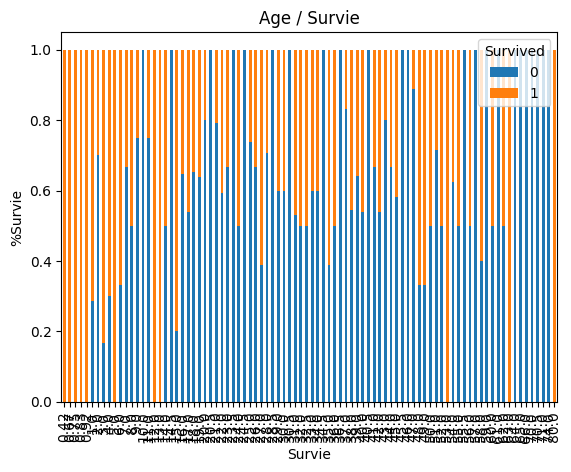

In [371]:
# Influence de l'âge sur la survie
import matplotlib.pyplot as plt
table= pd.crosstab(df.Age,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')


In [372]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\stephane.holtzmann\AppData\Local\Temp\ipykernel_6788\4228398340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [373]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,AgeBand
0,0,3,0,22.0,1,0,7.2500,False,True,"(16.336, 32.252]"
1,1,1,1,38.0,1,0,71.2833,False,False,"(32.252, 48.168]"
2,1,3,1,26.0,0,0,7.9250,False,True,"(16.336, 32.252]"
3,1,1,1,35.0,1,0,53.1000,False,True,"(32.252, 48.168]"
4,0,3,0,35.0,0,0,8.0500,False,True,"(32.252, 48.168]"


In [374]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] =4
df.drop(['AgeBand'],axis=1,inplace=True)

In [375]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1.0,1,0,7.2500,False,True
1,1,1,1,2.0,1,0,71.2833,False,False
2,1,3,1,1.0,0,0,7.9250,False,True
3,1,1,1,2.0,1,0,53.1000,False,True
4,0,3,0,2.0,0,0,8.0500,False,True


Text(0, 0.5, '%Survie')

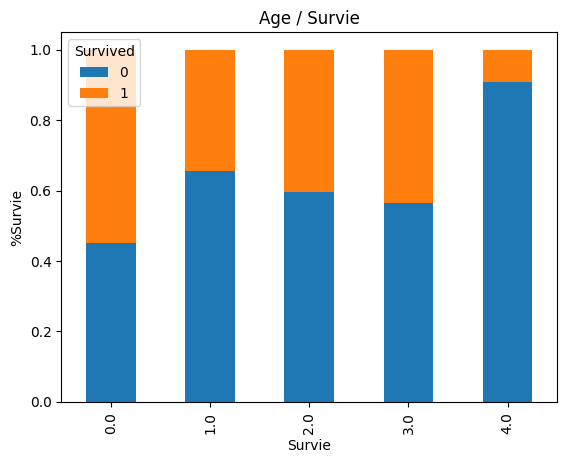

In [376]:
table= pd.crosstab(df.Age,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Survie')
plt.xlabel('Survie')
plt.ylabel('%Survie')


Text(0, 0.5, '')

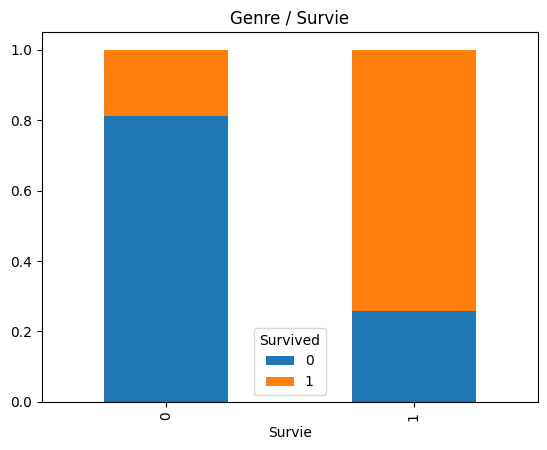

In [377]:
table= pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

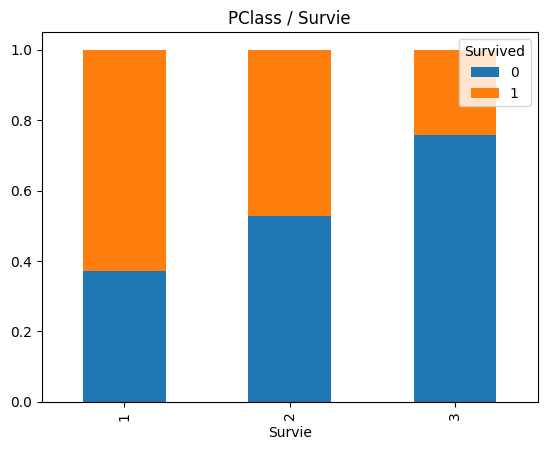

In [378]:
table= pd.crosstab(df.Pclass,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('PClass / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

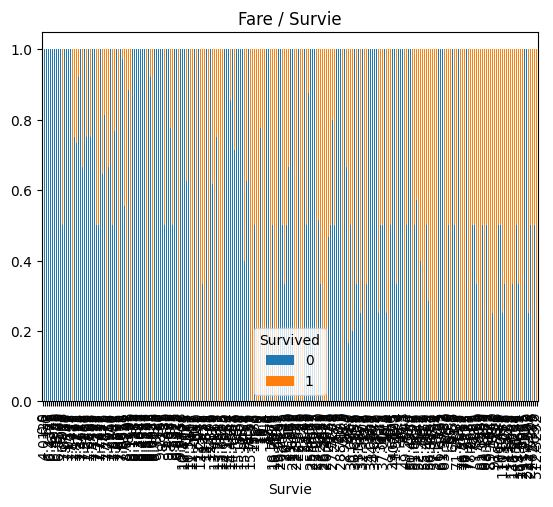

In [379]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')


In [380]:
df['FareGroup'] = pd.qcut(df['Fare'], 3, duplicates='drop')

df[['FareGroup', 'Survived']] \
    .groupby('FareGroup', as_index=False) \
    .mean() \
    .sort_values(by='FareGroup')


C:\Users\stephane.holtzmann\AppData\Local\Temp\ipykernel_6788\2573288424.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('FareGroup', as_index=False) \


,FareGroup,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [381]:
df.loc[ df['Fare'] <= 10.462, 'Fare'] = 0
df.loc[(df['Fare'] > 10.462) & (df['Fare'] <= 26.55), 'Fare'] = 1
df.loc[ df['Fare'] > 26.55, 'Fare'] = 2
df['Fare'] = df['Fare'].astype(int)

df.drop(['FareGroup'], axis=1,inplace=True)

Text(0, 0.5, '')

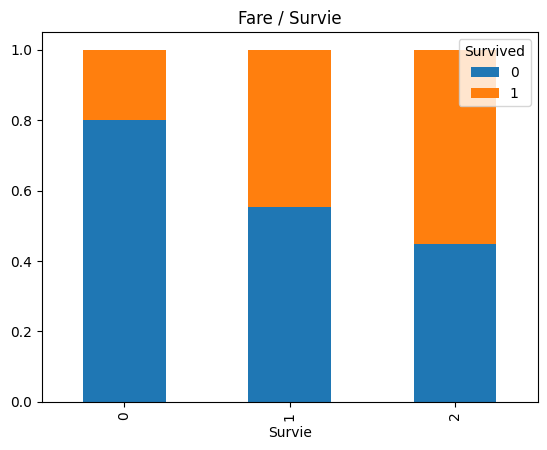

In [382]:
table= pd.crosstab(df.Fare,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fare / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [383]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1) EDA lisible si la colonne Embarked existe ---
if "Embarked" in df.columns:
    table = pd.crosstab(df["Embarked"], df["Survived"])
    table_pct = table.div(table.sum(axis=1), axis=0)

    table_pct.plot(kind="bar", stacked=True)
    plt.title("Embarked / Survie")
    plt.xlabel("Embarked")
    plt.ylabel("Proportion")
    plt.show()
else:
    print("⚠️ Colonne 'Embarked' absente (probablement déjà encodée en one-hot).")

# --- 2) Analyse après one-hot (si Embarked_... existe) ---
embarked_cols = [c for c in df.columns if c.startswith("Embarked_")]

if embarked_cols:
    for col in embarked_cols:
        table = pd.crosstab(df[col], df["Survived"])
        table_pct = table.div(table.sum(axis=1), axis=0)
        print(f"\n{col}")
        display(table_pct)
else:
    print("⚠️ Aucune colonne 'Embarked_' trouvée (pas encore encodée).")


⚠️ Colonne 'Embarked' absente (probablement déjà encodée en one-hot).

Embarked_Q


Survived,0,1
Embarked_Q,,
False,0.616708,0.383292
True,0.610390,0.389610



Embarked_S


Survived,0,1
Embarked_S,,
False,0.497959,0.502041
True,0.660991,0.339009


Text(0, 0.5, '')

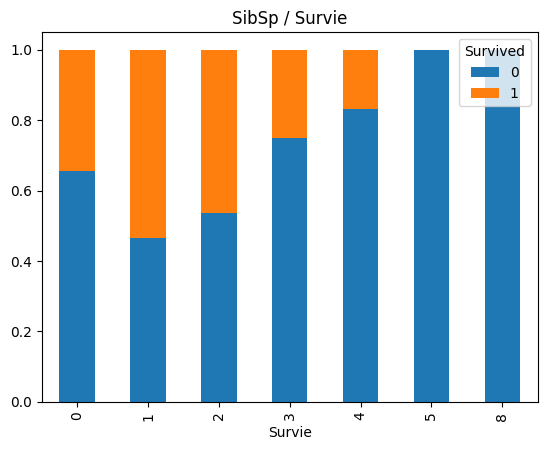

In [384]:
table= pd.crosstab(df.SibSp,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SibSp / Survie')
plt.xlabel('Survie')
plt.ylabel('')

Text(0, 0.5, '')

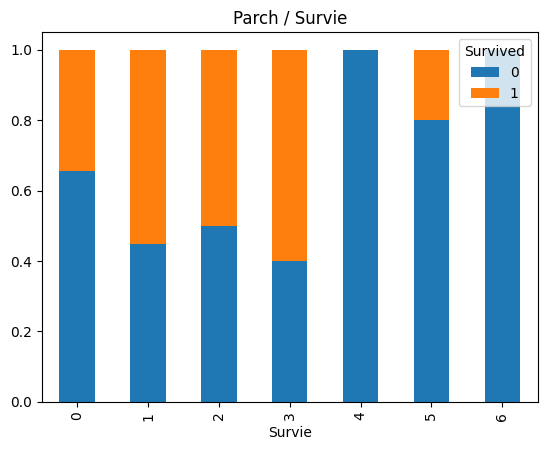

In [385]:
table= pd.crosstab(df.Parch,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Parch / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [386]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Text(0, 0.5, '')

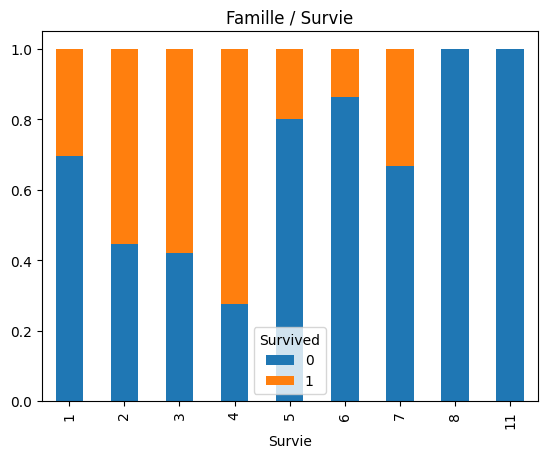

In [387]:
table= pd.crosstab(df.FamilySize,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Famille / Survie')
plt.xlabel('Survie')
plt.ylabel('')

In [388]:
# Premier tri
df.drop(['SibSp','Parch'],axis='columns',inplace=True)

In [389]:
#Separation
Features = df.drop('Survived',axis='columns')
y = df.Survived
Features.head()
Features.shape

(891, 7)

In [390]:
Features.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,3,0,1.0,0,False,True,2
1,1,1,2.0,2,False,False,2
2,3,1,1.0,0,False,True,1
3,1,1,2.0,2,False,True,2
4,3,0,2.0,0,False,True,1


In [391]:
# Ajustement des features
Features.tail()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
886,2,0,1.0,1,False,True,1
887,1,1,1.0,2,False,True,1
888,3,1,1.0,1,False,True,4
889,1,0,1.0,2,False,False,1
890,3,0,1.0,0,True,False,1


In [392]:
cols_to_drop = [c for c in ["Embarked", "Pclass"] if c in Features.columns]
Features.drop(columns=cols_to_drop, inplace=True)

print("Colonnes supprimées :", cols_to_drop)


Colonnes supprimées : ['Pclass']


In [393]:
Features.head()

,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,0,1.0,0,False,True,2
1,1,2.0,2,False,False,2
2,1,1.0,0,False,True,1
3,1,2.0,2,False,True,2
4,0,2.0,0,False,True,1


In [394]:
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.3, random_state=0)

In [395]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "max_features": ["sqrt"]
}

# 4) IMPORTANT: on ne score PAS sur Features,y (ça inclut potentiellement le test)
# Si tu veux un score global, tu fais de la CV sur X,y à part.
